# Wine Red Quality Prediction

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

warnings.simplefilter('ignore')

In [2]:
wine_data = pd.read_csv(r'C:\Users\IDEAPAD\Desktop\GOMYCODE\DataSet\Wine Quality\food-wine-quality\winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
wine_data.shape

(1599, 12)

In [15]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='count'>

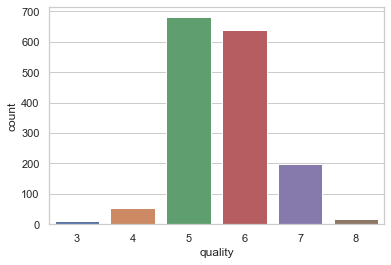

In [17]:
sns.set_theme(style="whitegrid")
sns.countplot(x='quality', data=wine_data)

<AxesSubplot:>

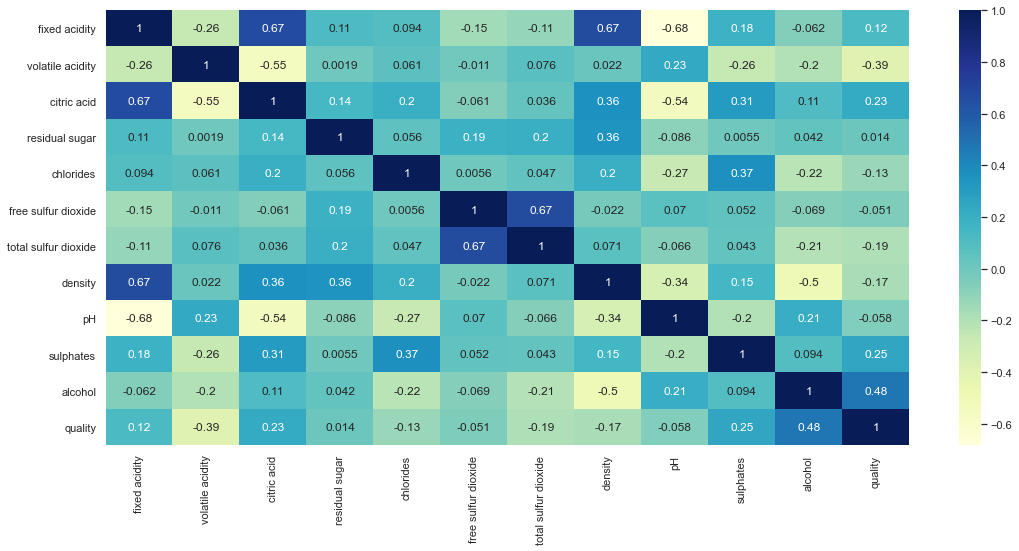

In [23]:
# View Corrélation
plt.figure(figsize=(18, 8))
corr = wine_data.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

# Random Forest Model

In [24]:
# Regrouper nos données de qualité en 2 groupes
wine_data['quality'] = wine_data['quality'].apply(lambda quality : 1 if quality >= 7 else 0)
wine_data['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [47]:
X = wine_data.drop('quality', axis = 1)
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model = RandomForestClassifier()
model.fit(X_train, y_train)
accuracies = cross_val_score(estimator = model,X = X_train,y= y_train , cv = 5)
print(("Train Score : {}%").format(round(accuracies.mean()*100, 2)))
accuracies2 = cross_val_score(estimator = model,X = X_test,y= y_test , cv = 5)
print(("Test Score : {}%").format(round(accuracies2.mean()*100, 2)))

Train Score : 91.24%
Test Score : 85.62%


# Regression Logistique

In [46]:
reglog = LogisticRegression()
reglog.fit(X_train, y_train)
reg_score = cross_val_score(estimator=reglog, X = X_train, y = y_train, cv = 5)
reg_score_test = cross_val_score(estimator=reglog, X = X_test, y = y_test, cv = 5)
print(("Train Score : {}%").format(round(max(reg_score * 100), 2)))
print(("Test Score : {}%").format(round(max(reg_score_test * 100), 2)))

Train Score : 89.41%
Test Score : 89.06%
